# Problem Statement

Consider that there is a wine manufacturing company and this company wants to create a new segment of wine. They want us to find the quality of the wine using several parameters.
Hence the objective is to take parameters like fixed_acidity, citric_acid etc. and predict the quality of wine.

# Work Flow

* Importing Libraries
* Importing dataset
* Data Analysis
* Data Preprocessing
* Train and Test Split
* Training the Model (Random Forest Model)
* Model Evaluation
* Prediction System

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking for null values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**The data has no null values**

# Data Analysis and Visualization

### Getting Statistical measures of the dataset

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Number of values for each quality

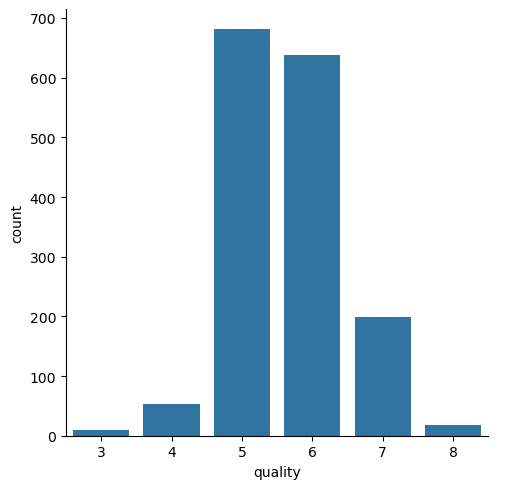

In [12]:
sns.catplot(x='quality', data=df, kind='count')

### Volatile Acidity vs Quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

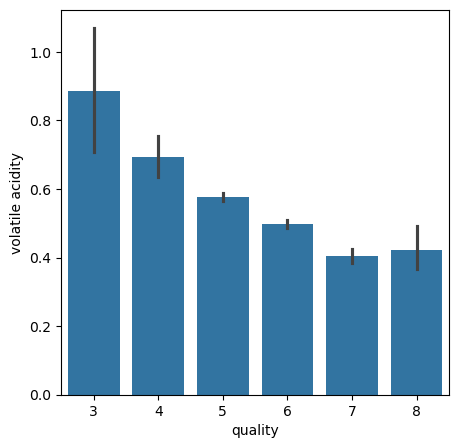

In [13]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

### Citric Acid vs Quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

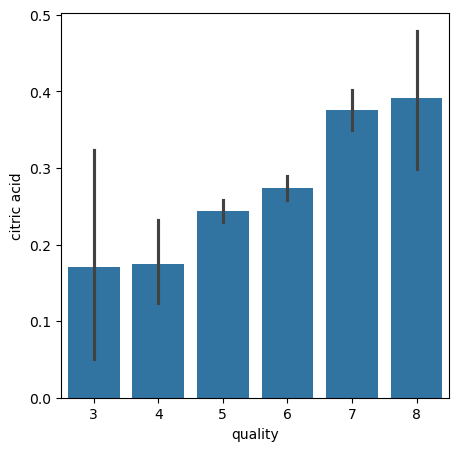

In [14]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

### Finding the correlation between different columns

In [16]:
correlation = df.corr()

In [17]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Heatmap to understand correlation between columns

<AxesSubplot:>

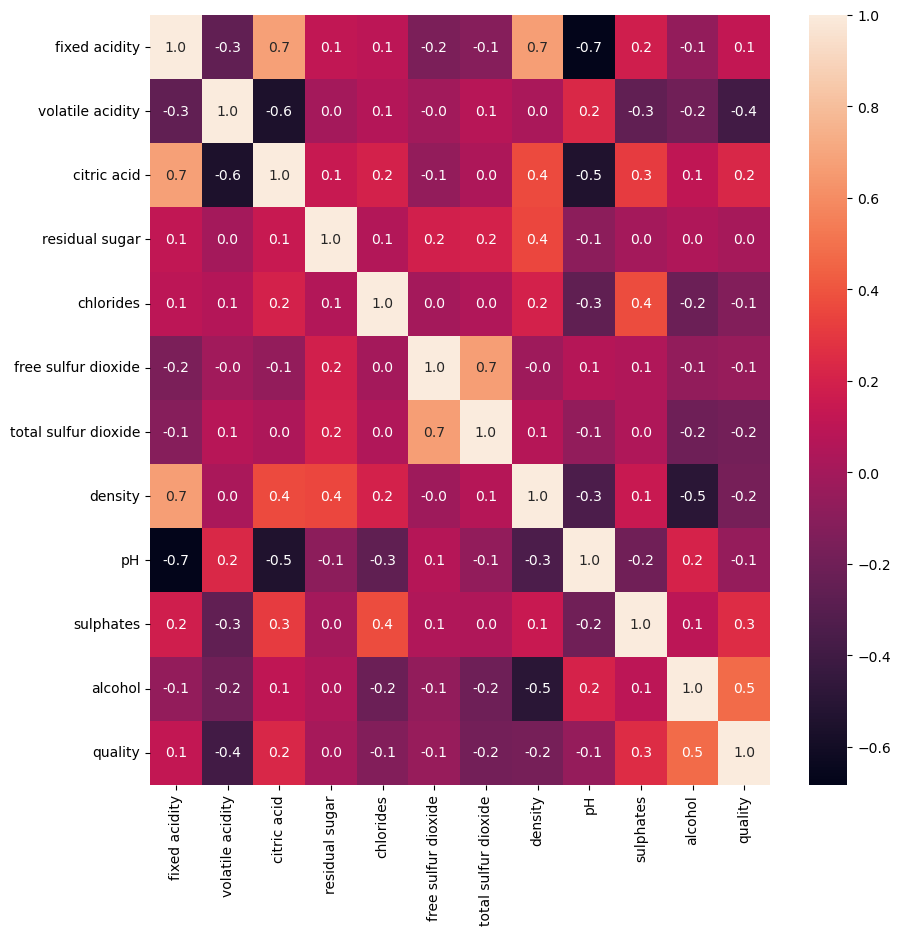

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True)

# Data Preprocessing 

In [26]:
X = df.drop('quality', axis=1)

In [27]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Label Binarization

In [25]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [30]:
Y.unique()

array([0, 1], dtype=int64)

# Train and Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training

In [34]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

In [39]:
X_train_prediction = model.predict(X_train)
accuracy_train = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on training data is : ', accuracy_train*100, "%")

Accuracy score on training data is :  100.0 %


In [41]:
X_test_prediction = model.predict(X_test)
accuracy_test = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on testing data is : ', accuracy_test*100, "%")

Accuracy score on testing data is :  93.75 %


# Building a Predictive System

In [44]:
in_col = list(X.columns)
inv = []

for i in in_col:
    x = float(input(f"Enter the value of {i} : "))
    inv.append(x)

input_data = tuple(inv)


# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print("\n Pridicton : ", prediction)


if prediction[0] == 0:
    print("\n***The Quality of wine is BAD***")
else:
    print("\n***The Quality of wine is GOOD***")

Enter the value of fixed acidity : 7.8
Enter the value of volatile acidity : 0.88
Enter the value of citric acid : 0.0
Enter the value of residual sugar : 2.6
Enter the value of chlorides : 0.098
Enter the value of free sulfur dioxide : 25.0
Enter the value of total sulfur dioxide : 67.0
Enter the value of density : 0.9968
Enter the value of pH : 3.2
Enter the value of sulphates : 0.68
Enter the value of alcohol : 9.8

 Pridicton :  [0]

***The Quality of wine is BAD***


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
